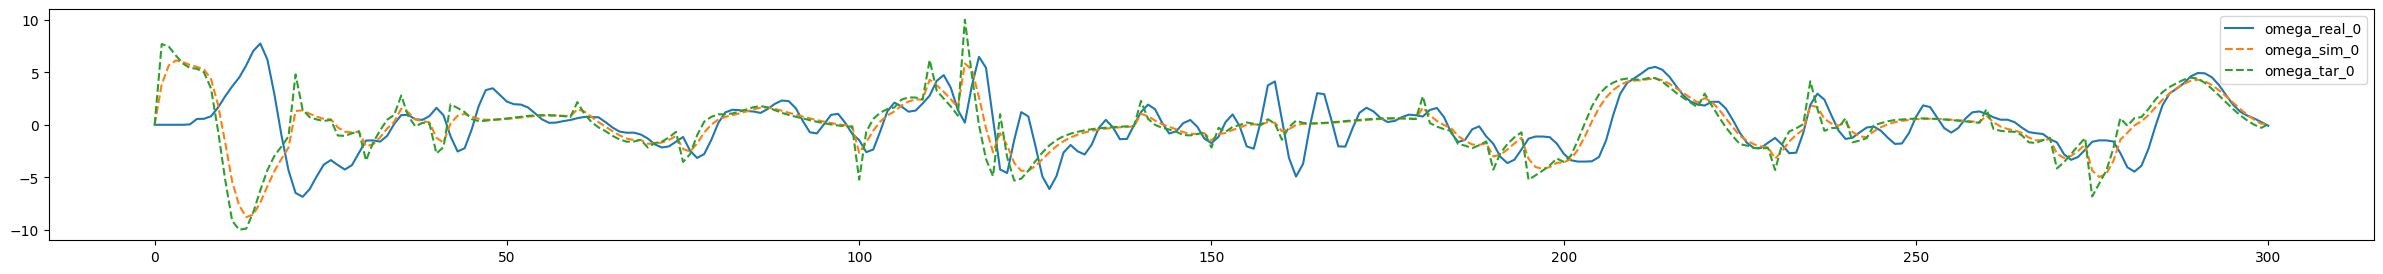

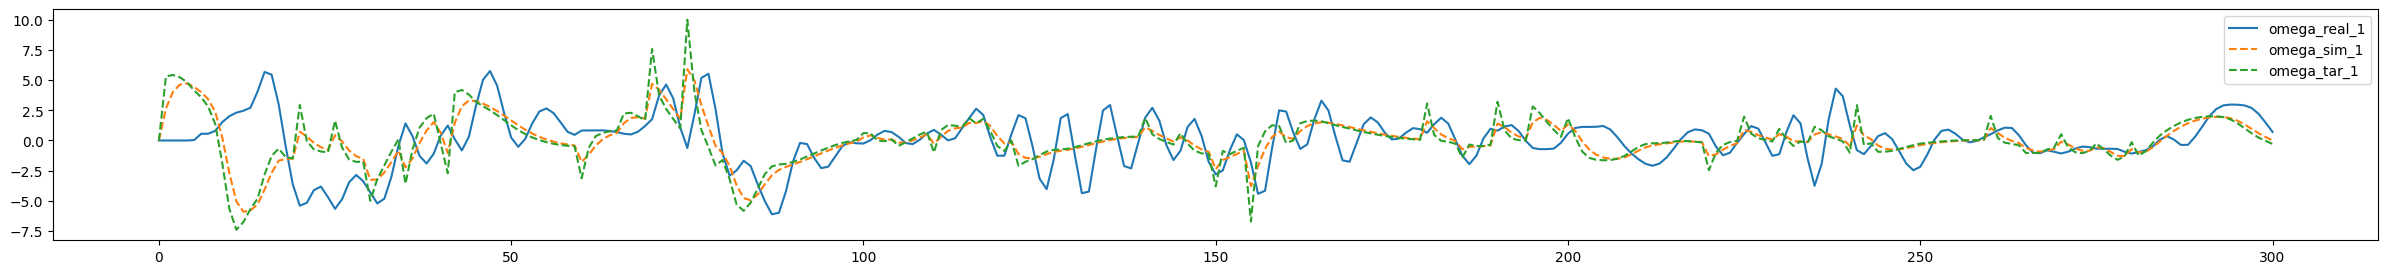

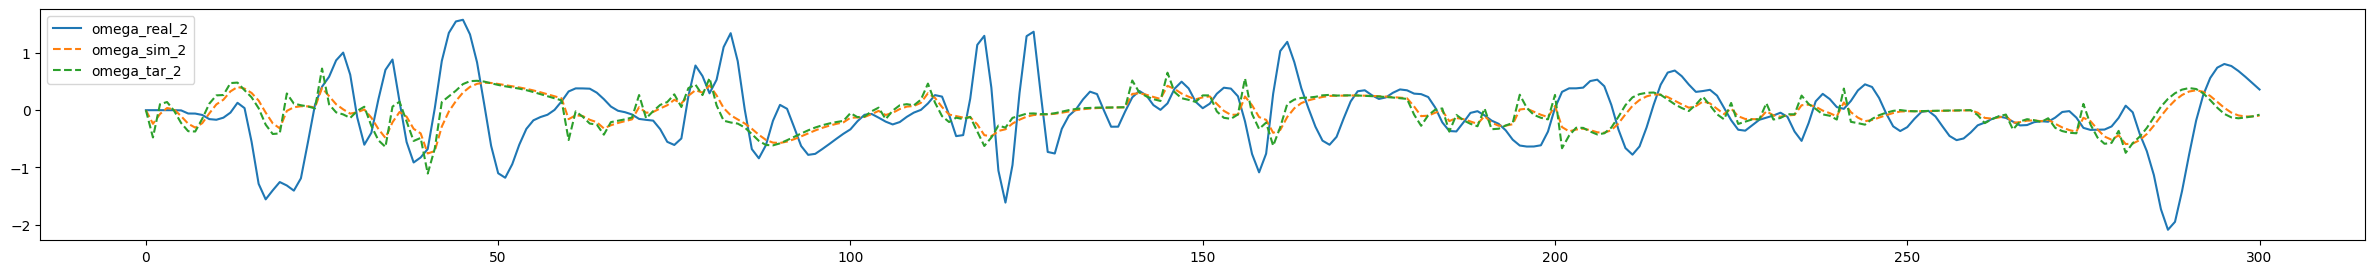

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
from jax import numpy as np
import seaborn as sns
import pandas as pd

from quadjax.dynamics import geom

# file_path = "../../results/state_seq_quad3d_free_jumping_l1_bodyrate.pkl"
with open("../../results/real_state_seq_.pkl", "rb") as f:
    state_seq_real = pickle.load(f)
with open("../../results/sim_state_seq_.pkl", "rb") as f:
    state_seq_sim = pickle.load(f)

# plot items
# pos = np.array([state['pos'] for state in state_seq])
# vel = np.array([state['vel'] for state in state_seq])
# pos_tar = np.array([state['pos_tar'] for state in state_seq])
# vel_tar = np.array([state['vel_tar'] for state in state_seq])
# rpy = geom.qtorpy(np.array([state['quat'] for state in state_seq]))
# rpy_tar = geom.qtorpy(np.array([state['quat_desired'] for state in state_seq]))

omega_real = np.array([state['omega'] for state in state_seq_real])
omega_sim = np.array([state['omega'] for state in state_seq_sim])
omega_tar = np.array([state['last_torque'] for state in state_seq_real]) / np.array([9e-3, 9e-3, 2e-3]) * np.array([10.0, 10.0, 3.0])

plt.rcParams['figure.figsize'] = [30, 3]
for i in range(3):
    plt.figure()
    # set figure size
    plt.plot(omega_real[:, i], label=f"omega_real_{i}")
    plt.plot(omega_sim[:, i], label=f"omega_sim_{i}", linestyle='--')
    plt.plot(omega_tar[:, i], label=f"omega_tar_{i}", linestyle='--')
    plt.legend()

# quat_real = np.array([state['quat'] for state in state_seq_real])
# quat_sim = np.array([state['quat'] for state in state_seq_sim])
# quat_tar = np.array([state['quat_desired'] for state in state_seq_real])

# plt.rcParams['figure.figsize'] = [10, 3]
# for i in range(4):
#     plt.figure()
#     # set figure size
#     plt.plot(quat_real[:, i], label=f"quat_real_{i}")
#     plt.plot(quat_sim[:, i], label=f"quat_sim_{i}", linestyle='--')
#     plt.plot(quat_tar[:, i], label=f"quat_tar_{i}", linestyle='--')
#     plt.legend()

# plot
# fig, axs = plt.subplots(1, 3, figsize=(15, 3))
# # plot x, y, z in three plots
# labels = ['x', 'y', 'z']
# labels_tar = ['x_tar', 'y_tar', 'z_tar']
# for i in range(3):
#     axs[i].plot(pos[:, i], label=labels[i])
#     axs[i].plot(pos_tar[:, i], label=labels_tar[i], linestyle='--')
#     axs[i].set_xlabel('time')
#     axs[i].set_ylabel('value')
#     axs[i].legend()

# print pos_traj in the format of (x, y, z) with 2 dec
# print('quadrotor position:')
# for state in state_seq[:100][::10]:
#     pos = state['pos']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('quadrotor velocity:')
# for state in state_seq[:100][::10]:
#     pos = state['vel']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('quadrotor attitude:')
# for state in state_seq[:100][::10]:
#     pos = state['rpy']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('reference position:')
# for state in state_seq[:100][::10]:
#     pos = state['pos_tar']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('reference velocity:')
# for state in state_seq[:100][::10]:
#     pos = state['vel_tar']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('reference attitude:')
# for state in state_seq[:100][::10]:
#     pos = state['rpy_tar']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('error position:')
# for state in state_seq[:100][::10]:
#     pos = state['pos'] - state['pos_tar']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('error velocity:')
# for state in state_seq[:100][::10]:
#     pos = state['vel'] - state['vel_tar']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')
# print('error attitude:')
# for state in state_seq[:100][::10]:
#     pos = state['rpy'] - state['rpy_tar']
#     print(f"({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f})")
# print('\n')

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

# load data from ../results/eval_err_pos_mppi_N${N}_H40.pkl
all_data = pd.DataFrame(
    columns=['N', 'error']
)

for N in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    with open(f'../../results/eval_err_pos_mppi_N{N}_H40.pkl', 'rb') as f:
        data = pickle.load(f) # data is a list of 1000 arrays
        data = np.array(data).flatten()
    # append N and error to all_data
    all_data = pd.concat(
        [
            all_data,
            pd.DataFrame(
                {
                    'N': [f'N{N} \n mu:{np.mean(data):.2f} \n std:{np.std(data):.2f}']*len(data),
                    'error': data,
                }
            )
        ]
    )

sns.violinplot(x='N', y='error', data=all_data, ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('error')

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))

# load data from ../results/eval_err_pos_mppi_N${N}_H40.pkl
all_data = pd.DataFrame(
    columns=['H', 'error']
)

for H in [2, 4, 8, 16, 32, 64, 128]:
    with open(f'../../results/eval_err_pos_mppi_N128_H{H}.pkl', 'rb') as f:
        data = pickle.load(f) # data is a list of 1000 arrays
        data = np.array(data).flatten()
    # append N and error to all_data
    all_data = pd.concat(
        [
            all_data,
            pd.DataFrame(
                {
                    'H': [f'H{H} \n mu:{np.mean(data):.2f} \n std:{np.std(data):.2f}']*len(data),
                    'error': data,
                }
            )
        ]
    )

sns.violinplot(x='H', y='error', data=all_data, ax=ax)
ax.set_xlabel('H')
ax.set_ylabel('error')

In [ ]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pickle
from jax import numpy as np
import seaborn as sns
import pandas as pd

# find all .pkl file in ../../results/init/
os.chdir('../../results/RMA/')
files = os.listdir()
files = [f for f in files if f.endswith('.pkl')]
files = [f for f in files if f.startswith('eval_err_pos')]
files = [f for f in files if not 'DR' in f]
# files = [f for f in files if (('sin' in f))]
# files = [f for f in files if ('robust' not in f)]
# files = [f for f in files if (('periodic' in f) or ('sin' in f) or ('drag' in f))]
# files = [f for f in files if ('RMA') in f]
# files = [f for f in files if not ('A-RMA') in f]
# include_name_list = ['RMA-DR_periodic', 'RMA_periodic', 'DATT-DR_peridoc', 'DATT_periodic', 'DATT-DR_periodic', 'expert_PPO_periodic', 'expert_PPO-DR_periodic']
# files = [f for f in files if any(name in f for name in include_name_list)]
# files = [f for f in files if not any(name in f for name in exclude_name_list)]

# sort files by name
files.sort()

# load all files
all_data = pd.DataFrame(
    columns=['algo', 'error', 'mean', 'std']
)

for file in files:
    file_name = file.split(".")[0]
    exp_name = file_name[13:]
    with open(file, 'rb') as f:
        data = pickle.load(f)
    data = np.array(data).flatten()
    # append N and error to all_data
    all_data = pd.concat(
        [
            all_data,
            pd.DataFrame(
                {
                    'algo': [f'{exp_name} \n mu:{np.mean(data):.3f} \n std:{np.std(data):.3f}']*len(data),
                    'error': data,
                    'mean': [np.mean(data)]*len(data),
                    'std': [np.std(data)]*len(data),
                }
            )
        ]
    )

# plot in a order from largest mean to smallest mean
# all_data = all_data.sort_values(by=['mean'], ascending=False)
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 5))
print('start plotting...')
sns.violinplot(x='algo', y='error', data=all_data, ax=ax)
# plot with y limit from 0 to 1
# ax.set_ylim(0, 1)
print('done')
ax.set_xlabel('algo')
ax.set_ylabel('error')